A2     0.103196
A10    0.095153
A5     0.092751
A6     0.087623
A7     0.064477
A1     0.057427
A3     0.056918
A4     0.055804
A8     0.041712
A9     0.026120
dtype: float64
A2     0.103196
A10    0.095153
A5     0.092751
A6     0.087623
A7     0.064477
A1     0.057427
A3     0.056918
A4     0.055804
A8     0.041712
A9     0.026120
dtype: float64


C:\Users\Mohammad Reza\AppData\Local\Temp\ipykernel_14036\2183644558.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sensitivity_results[f'p={p}'] = scores
C:\Users\Mohammad Reza\AppData\Local\Temp\ipykernel_14036\2183644558.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sensitivity_results[f'p={p}'] = scores
C:\Users\Mohammad Reza\AppData\Local\Temp\ipykernel_14036\2183644558.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor 

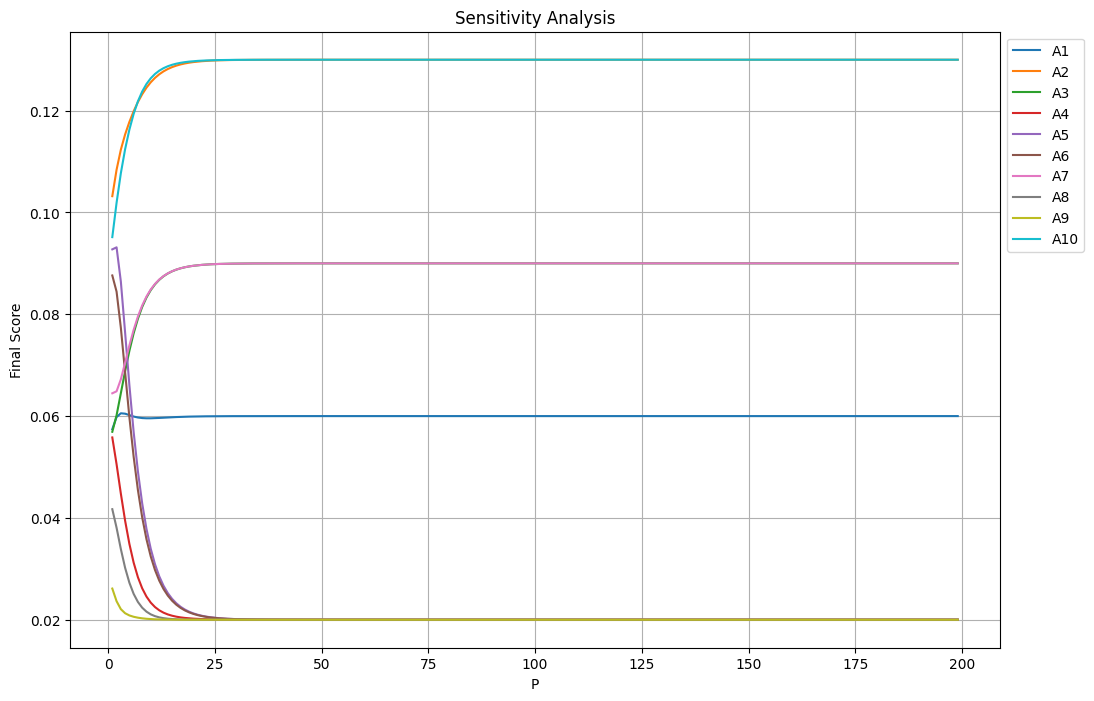

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Data

# Sample data for normalized decision matrix (Table 4-7)
normalized_decision_matrix = pd.DataFrame({
    'C1': [0.03, 0.08, 0.08, 0.11, 0.11, 0.10, 0.08, 0.06, 0.03, 0.06],
    'C2': [0.04, 0.10, 0.04, 0.07, 0.06, 0.07, 0.10, 0.04, 0.07, 0.10],
    'C3': [0.06, 0.13, 0.09, 0.02, 0.02, 0.02, 0.09, 0.02, 0.02, 0.13],
    'C4': [0.09, 0.16, 0.06, 0.02, 0.02, 0.02, 0.07, 0.02, 0.02, 0.10],
    'C5': [0.07, 0.12, 0.07, 0.07, 0.15, 0.14, 0.07, 0.07, 0.02, 0.12],
    'C6': [0.06, 0.11, 0.05, 0.04, 0.08, 0.10, 0.05, 0.04, 0.02, 0.10],
    'C7': [0.02, 0.05, 0.02, 0.07, 0.07, 0.07, 0.06, 0.02, 0.02, 0.07],
    'C8': [0.04, 0.10, 0.04, 0.04, 0.15, 0.14, 0.04, 0.04, 0.02, 0.10],
    'C9': [0.10, 0.10, 0.11, 0.10, 0.07, 0.10, 0.07, 0.10, 0.10, 0.10],
    'C10': [0.05, 0.08, 0.04, 0.04, 0.15, 0.14, 0.04, 0.02, 0.02, 0.10],
    'C11': [0.04, 0.11, 0.09, 0.07, 0.07, 0.12, 0.09, 0.04, 0.02, 0.08],
    'C12': [0.09, 0.10, 0.08, 0.09, 0.12, 0.12, 0.08, 0.07, 0.02, 0.08],
    'C13': [0.03, 0.06, 0.03, 0.03, 0.14, 0.12, 0.03, 0.02, 0.02, 0.07],
    'C14': [0.01, 0.05, 0.01, 0.02, 0.02, 0.02, 0.08, 0.02, 0.01, 0.08],
    'C15': [0.03, 0.06, 0.03, 0.02, 0.02, 0.02, 0.04, 0.02, 0.01, 0.06],
    'C16': [0.11, 0.16, 0.05, 0.14, 0.16, 0.12, 0.06, 0.10, 0.03, 0.08]
}, index=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'])

# Sample data for entropy results (Table 4-8)
entropy_results = pd.DataFrame({
    'e_j': [0.73, 0.57, 0.50, 0.64, 0.58, 0.67, 0.69, 0.59, 0.68, 0.55, 0.58, 0.91, 0.58, 0.52, 0.46, 0.80],
    'd_j': [0.01, 0.01, 0.03, 0.11, 0.01, 0.01, 0.06, 0.02, 0.05, 0.05, 0.01, 0.00, 0.21, 0.17, 0.04, 0.20],
    'phi_j': [0.002, 0.002, 0.087, 0.018, 0.002, 0.001, 0.010, 0.003, 0.009, 0.075, 0.002, 0.0003, 0.065, 0.027, 0.006, 0.061]
}, index=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16'])

# Sample data for pairwise comparison matrix (Table 4-9)
pairwise_comparison_matrix = pd.DataFrame({
    'C1': [1, 1/3, 3, 3, 1/3, 3, 1/3, 1/3, 5, 5, 1/3, 1/5, 1/7, 1/5, 1/3, 1],
    'C2': [3, 1, 5, 5, 1/3, 3, 1/3, 1/3, 7, 7, 1/3, 1/5, 1/7, 1/5, 1/3, 1],
    'C3': [1/3, 1/5, 1, 1/3, 3, 3, 3, 3, 1/7, 1/5, 3, 5, 7, 1/3, 1/3, 1],
    'C4': [1/3, 1/5, 3, 1, 5, 5, 5, 5, 1/7, 1/5, 3, 7, 7, 3, 3, 1],
    'C5': [3, 3, 1/3, 1/5, 1, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 3, 3, 5, 5, 1],
    'C6': [1/3, 1/3, 1/3, 1/3, 7, 1, 3, 1/3, 3, 5, 5, 1/7, 1/7, 7, 7, 1],
    'C7': [3, 3, 3, 1/3, 7, 1/3, 1, 1/3, 5, 5, 5, 1/7, 1/7, 7, 7, 1],
    'C8': [3, 3, 3, 1/3, 7, 3, 1/3, 1, 5, 5, 5, 1/7, 1/7, 7, 7, 1],
    'C9': [1/5, 1/7, 7, 7, 7, 1/3, 1/3, 1/3, 1, 1/7, 1/3, 1/3, 3, 3, 3, 1],
    'C10': [1/5, 1/7, 5, 5, 7, 1/5, 1/5, 1/5, 7, 1, 1/3, 1/3, 1/3, 1/3, 1/3, 1],
    'C11': [3, 3, 3, 1/3, 7, 1/5, 1/5, 1/5, 1/3, 1/3, 1, 1/3, 1/3, 1/3, 1/3, 1],
    'C12': [5, 5, 5, 1/3, 3, 7, 7, 7, 3, 3, 3, 1, 1/3, 1/3, 1/3, 1],
    'C13': [7, 7, 7, 1/3, 3, 7, 7, 7, 1/3, 1/3, 1/3, 3, 1, 1/7, 1/7, 1],
    'C14': [5, 5, 1/3, 3, 5, 1/7, 1/7, 1/7, 3, 3, 3, 1/3, 1/3, 1, 1/3, 1],
    'C15': [3, 3, 1/3, 3, 5, 1/7, 1/7, 1/7, 3, 3, 3, 1/3, 1/3, 1/3, 1, 1],
    'C16': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}, index=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16'])

# Step 2: Calculate Weights from Pairwise Comparison

# Function to calculate geometric mean of each row
def geometric_mean(row):
    return np.exp(np.log(row).mean())

# Calculate geometric mean for each row in pairwise comparison matrix
geometric_means = pairwise_comparison_matrix.apply(geometric_mean, axis=1)

# Normalize the geometric means to get the weights
weights = geometric_means / geometric_means.sum()

# Step 3: Combine Entropy Weights and Pairwise Comparison Weights

# Normalize entropy weights
normalized_entropy_weights = entropy_results['phi_j'] / entropy_results['phi_j'].sum()

# Combine weights (assuming equal importance for simplicity)
final_weights = (weights + normalized_entropy_weights) / 2

# Step 4: Compute Final Scores for Each Method

# Multiply normalized decision matrix by final weights
weighted_decision_matrix = normalized_decision_matrix * final_weights.values

# Compute scores for each method by summing weighted values
scores = weighted_decision_matrix.sum(axis=1)

# Step 5: Rank the Mining Methods

# Rank the methods based on their scores
ranked_methods = scores.sort_values(ascending=False)

# Display the ranked methods
print(ranked_methods)

# Step 6: Calculate Final Weights Considering Internal Relationships

# Additional data for internal relationship matrix (Matrix B)
# Replace ... with actual data from Table 4-10
internal_relationship_matrix = pd.DataFrame({
    'C1': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'C2': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'C3': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'C4': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'C5': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'C6': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'C7': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'C8': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    'C9': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    'C10': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    'C11': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    'C12': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    'C13': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    'C14': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    'C15': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    'C16': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
}, index=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16'])

# Calculate the final weights considering internal relationships
theta = final_weights.values
B = internal_relationship_matrix.values
for i in range(len(theta)):
    theta[i] = theta[i] + np.sum(B[:, i] * theta)

# Normalize the final weights
final_weights_normalized = theta / np.sum(theta)

# Step 7: Calculate Final Scores Using the Updated Weights

# Multiply normalized decision matrix by the final normalized weights
final_weighted_decision_matrix = normalized_decision_matrix * final_weights_normalized

# Compute scores for each method by summing weighted values
final_scores = final_weighted_decision_matrix.sum(axis=1)

# Step 8: Rank the Mining Methods Based on Final Scores

# Rank the methods based on their final scores
final_ranked_methods = final_scores.sort_values(ascending=False)

# Display the ranked methods
print(final_ranked_methods)

# Sensitivity Analysis

# Function to perform sensitivity analysis
def sensitivity_analysis(normalized_decision_matrix, weights, p_values):
    sensitivity_results = pd.DataFrame(index=normalized_decision_matrix.index)
    for p in p_values:
        adjusted_weights = weights ** p
        adjusted_weights /= adjusted_weights.sum()
        weighted_decision_matrix = normalized_decision_matrix * adjusted_weights
        scores = weighted_decision_matrix.sum(axis=1)
        sensitivity_results[f'p={p}'] = scores
    return sensitivity_results

# Define p values for sensitivity analysis
p_values = list(range(1, 200))

# Perform sensitivity analysis
sensitivity_results = sensitivity_analysis(normalized_decision_matrix, final_weights_normalized, p_values)

# Plot the sensitivity analysis results
plt.figure(figsize=(12, 8))
for method in sensitivity_results.index:
    plt.plot(p_values, sensitivity_results.loc[method], label=method)
plt.xlabel('P')
plt.ylabel('Final Score')
plt.title('Sensitivity Analysis')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


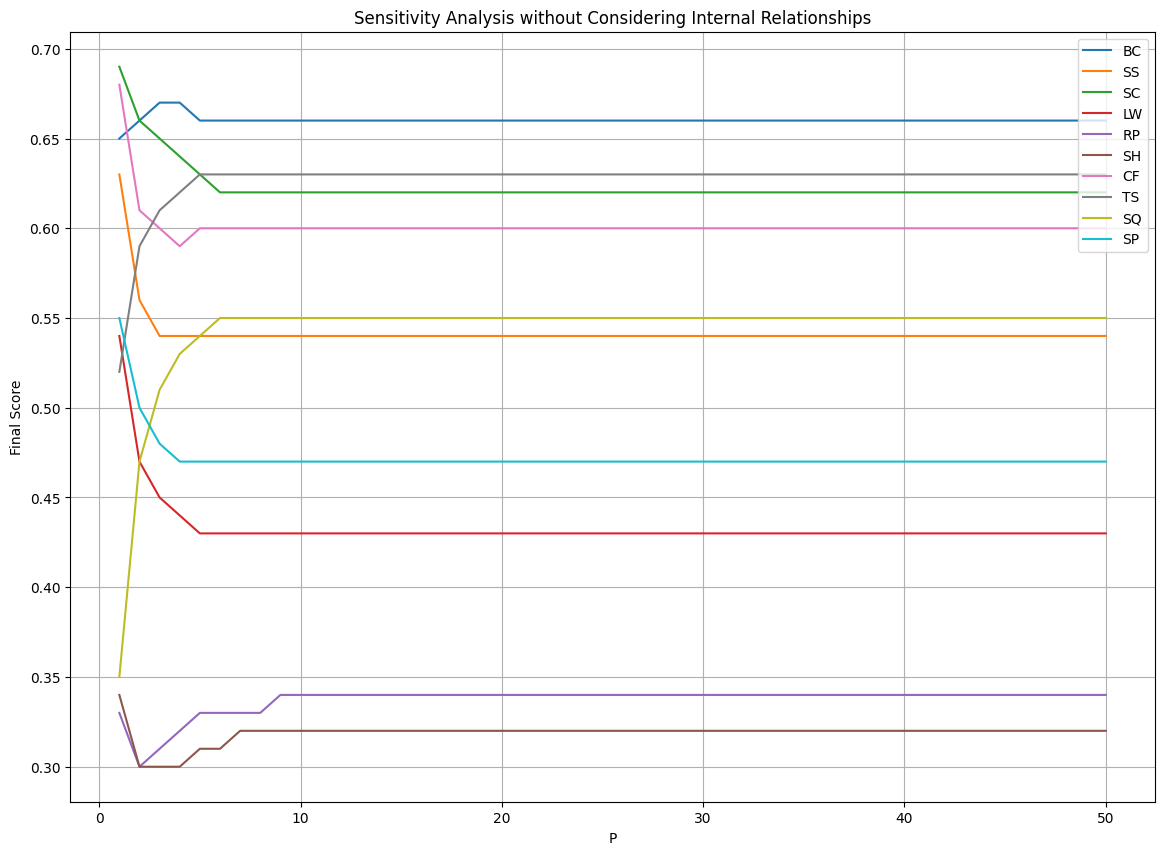

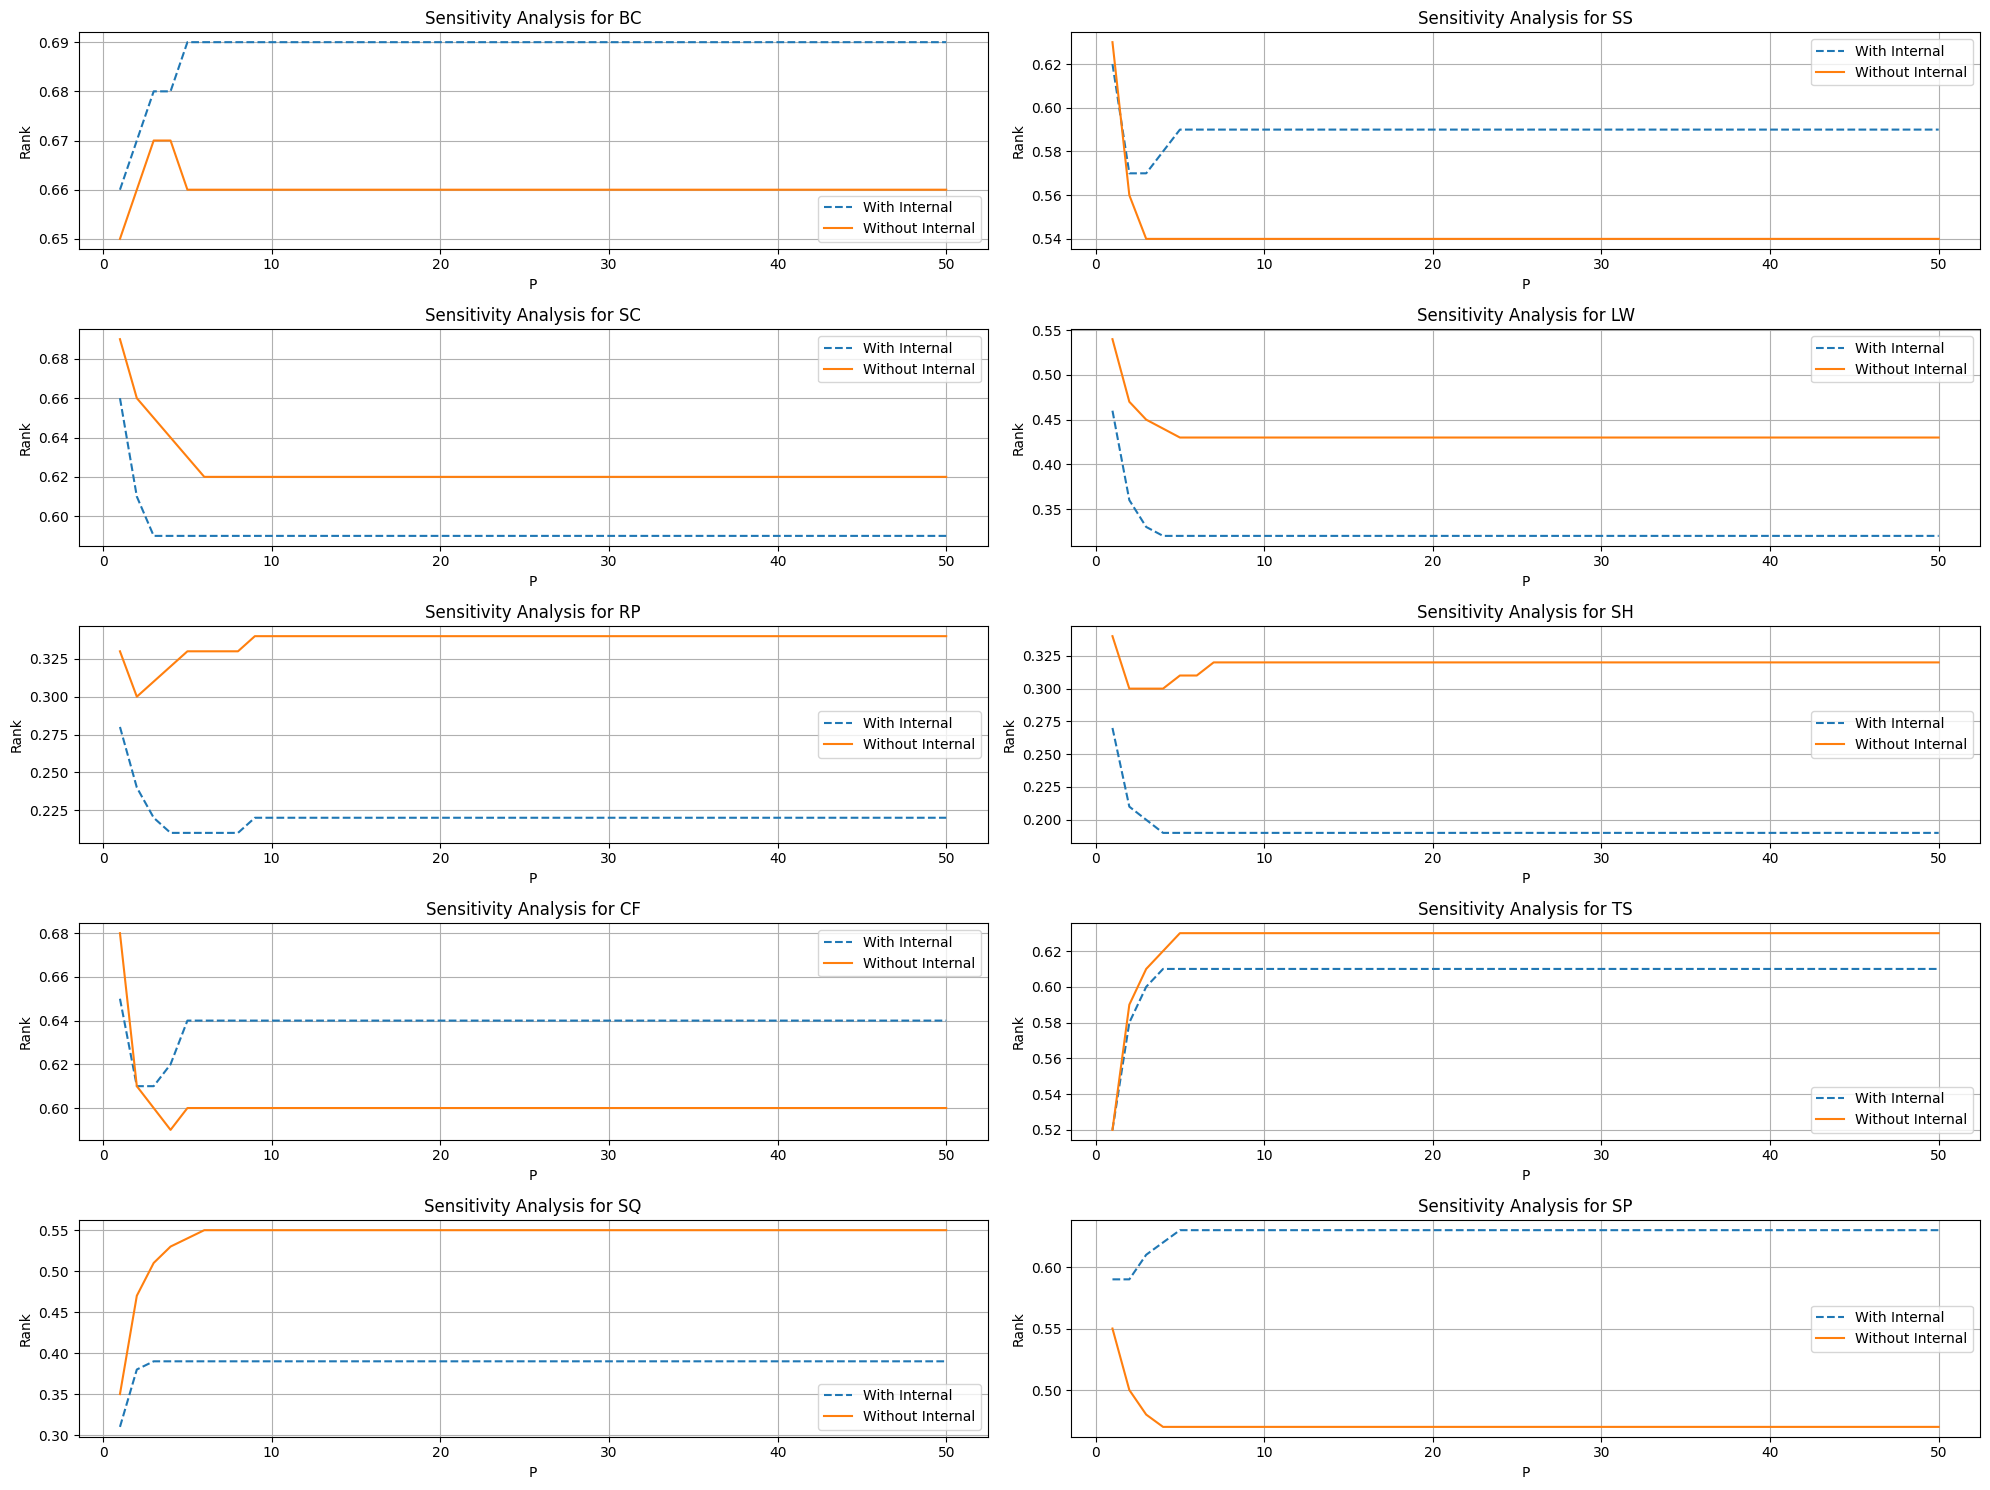

In [3]:
# Sensitivity analysis data with internal relationships (Example Data)
sensitivity_with_internal_relationships = {
    'BC': [0.66, 0.67, 0.68, 0.68, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69],
    'SS': [0.62, 0.57, 0.57, 0.58, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59],
    'SC': [0.66, 0.61, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59],
    'LW': [0.46, 0.36, 0.33, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32],
    'RP': [0.28, 0.24, 0.22, 0.21, 0.21, 0.21, 0.21, 0.21, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22],
    'SH': [0.27, 0.21, 0.20, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19],
    'CF': [0.65, 0.61, 0.61, 0.62, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64],
    'TS': [0.52, 0.58, 0.60, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61],
    'SQ': [0.31, 0.38, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39],
    'SP': [0.59, 0.59, 0.61, 0.62, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63]
}

# Define p_values based on provided images and tables
p_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20, 30, 40, 50, 100, 150, 160, 170, 180, 190, 193]

# Plotting sensitivity analysis without internal relationships
plt.figure(figsize=(14, 10))
for method, scores in sensitivity_without_internal_relationships.items():
    plt.plot(p_values[:len(scores)], scores, label=method)

plt.xlabel('P')
plt.ylabel('Final Score')
plt.title('Sensitivity Analysis without Considering Internal Relationships')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Additional visualizations for comparing methods with and without internal relationships
methods = ['BC', 'SS', 'SC', 'LW', 'RP', 'SH', 'CF', 'TS', 'SQ', 'SP']

plt.figure(figsize=(20, 15))
for i, method in enumerate(methods):
    plt.subplot(5, 2, i + 1)
    plt.plot(p_values[:len(sensitivity_with_internal_relationships[method])], sensitivity_with_internal_relationships[method], label='With Internal', linestyle='--')
    plt.plot(p_values[:len(sensitivity_without_internal_relationships[method])], sensitivity_without_internal_relationships[method], label='Without Internal')
    plt.xlabel('P')
    plt.ylabel('Rank')
    plt.title(f'Sensitivity Analysis for {method}')
    plt.legend(loc='best')
    plt.grid(True)

plt.tight_layout()
plt.show()


Decision Matrix shape: (10, 16)
Fuzzy Reliability Matrix shape: (10, 16, 3)
Crisp Scores shape: (10,)
Variance Scores shape: (10,)
Standard Deviation Scores shape: (10,)
  Alternative  Crisp Score  Variance  Standard Deviation
0          A1     0.099613  0.000086            0.007661
1          A2     0.101686  0.000079            0.007990
2          A3     0.096333  0.000055            0.006858
3          A4     0.095192  0.000063            0.006969
4          A5     0.101165  0.000060            0.005947
5          A6     0.103827  0.000074            0.007256
6          A7     0.104745  0.000052            0.006437
7          A8     0.106563  0.000061            0.006268
8          A9     0.097647  0.000052            0.006367
9         A10     0.093229  0.000066            0.006832


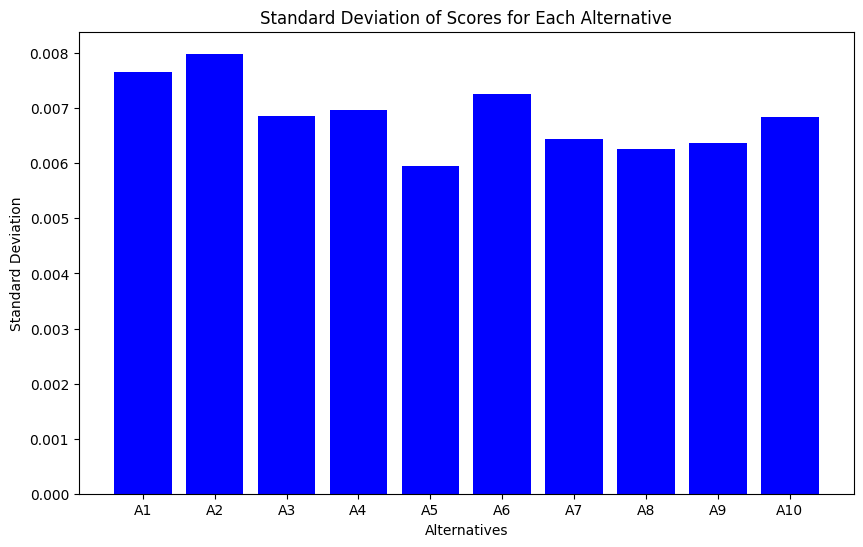

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example decision matrix from the data provided earlier (normalized)
decision_matrix = np.array([
    [0.03, 0.04, 0.06, 0.09, 0.07, 0.06, 0.02, 0.04, 0.10, 0.05, 0.04, 0.09, 0.03, 0.02, 0.01, 0.11],
    [0.06, 0.07, 0.09, 0.13, 0.09, 0.08, 0.02, 0.07, 0.13, 0.08, 0.07, 0.07, 0.09, 0.04, 0.05, 0.14],
    [0.08, 0.10, 0.13, 0.10, 0.09, 0.11, 0.11, 0.10, 0.08, 0.11, 0.08, 0.09, 0.12, 0.07, 0.05, 0.16],
    [0.11, 0.13, 0.12, 0.14, 0.10, 0.15, 0.12, 0.14, 0.11, 0.15, 0.12, 0.13, 0.15, 0.12, 0.08, 0.18],
    [0.10, 0.11, 0.15, 0.12, 0.15, 0.13, 0.11, 0.13, 0.11, 0.14, 0.11, 0.14, 0.12, 0.09, 0.08, 0.17],
    [0.13, 0.14, 0.13, 0.11, 0.13, 0.12, 0.13, 0.12, 0.14, 0.12, 0.14, 0.15, 0.13, 0.13, 0.11, 0.15],
    [0.14, 0.15, 0.12, 0.13, 0.14, 0.14, 0.15, 0.14, 0.13, 0.14, 0.15, 0.15, 0.14, 0.14, 0.13, 0.16],
    [0.13, 0.14, 0.11, 0.12, 0.12, 0.13, 0.14, 0.12, 0.14, 0.13, 0.14, 0.13, 0.13, 0.13, 0.12, 0.14],
    [0.12, 0.13, 0.10, 0.11, 0.11, 0.12, 0.13, 0.11, 0.13, 0.12, 0.13, 0.12, 0.12, 0.12, 0.11, 0.13],
    [0.11, 0.12, 0.09, 0.10, 0.10, 0.11, 0.12, 0.10, 0.12, 0.11, 0.12, 0.11, 0.11, 0.11, 0.10, 0.12]
])

# Define fuzzy triangular numbers for reliability degree from Table 4-16
reliability_fuzzy = {
    "کاملا مطمئن": (0.8, 1.0, 1.0),
    "مطمئن": (0.6, 0.8, 1.0),
    "مردد": (0.4, 0.6, 0.8),
    "نامطمئن": (0.2, 0.4, 0.6),
    "کاملا نامطمئن": (0.0, 0.2, 0.4)
}

# Table 4-16 degree of reliability for each criterion and alternative
reliability_degrees = [
    ["مطمئن", "کاملا مطمئن", "مطمئن", "کاملا مطمئن", "مطمئن", "کاملا مطمئن", "نامطمئن", "مطمئن", "کاملا مطمئن", "نامطمئن", "مطمئن", "مطمئن", "مطمئن", "نامطمئن", "کاملا مطمئن", "کاملا مطمئن"],
    ["نامطمئن", "مطمئن", "کاملا نامطمئن", "مطمئن", "کاملا مطمئن", "کاملا مطمئن", "کاملا مطمئن", "کاملا مطمئن", "مطمئن", "مطمئن", "کاملا مطمئن", "کاملا مطمئن", "کاملا مطمئن", "کاملا مطمئن", "نامطمئن", "مطمئن"],
    ["نامطمئن", "مطمئن", "نامطمئن", "مطمئن", "کاملا مطمئن", "مطمئن", "کاملا مطمئن", "کاملا مطمئن", "نامطمئن", "مطمئن", "کاملا مطمئن", "نامطمئن", "مطمئن", "مطمئن", "کاملا مطمئن", "نامطمئن"],
    ["مطمئن", "نامطمئن", "نامطمئن", "مطمئن", "مطمئن", "مطمئن", "کاملا مطمئن", "مطمئن", "نامطمئن", "مطمئن", "نامطمئن", "مطمئن", "نامطمئن", "کاملا مطمئن", "نامطمئن", "کاملا مطمئن"],
    ["نامطمئن", "مطمئن", "کاملا مطمئن", "نامطمئن", "نامطمئن", "کاملا مطمئن", "مطمئن", "مطمئن", "مطمئن", "مطمئن", "نامطمئن", "مطمئن", "مطمئن", "مطمئن", "کاملا مطمئن", "مطمئن"],
    ["کاملا مطمئن", "مطمئن", "نامطمئن", "مطمئن", "کاملا مطمئن", "مطمئن", "کاملا مطمئن", "مطمئن", "نامطمئن", "کاملا مطمئن", "نامطمئن", "مطمئن", "نامطمئن", "کاملا مطمئن", "مطمئن", "مطمئن"],
    ["مطمئن", "کاملا مطمئن", "نامطمئن", "نامطمئن", "مطمئن", "کاملا مطمئن", "مطمئن", "نامطمئن", "مطمئن", "کاملا مطمئن", "کاملا مطمئن", "مطمئن", "کاملا مطمئن", "مطمئن", "نامطمئن", "مطمئن"],
    ["مطمئن", "مطمئن", "کاملا مطمئن", "نامطمئن", "کاملا مطمئن", "مطمئن", "نامطمئن", "مطمئن", "مطمئن", "نامطمئن", "مطمئن", "مطمئن", "کاملا مطمئن", "مطمئن", "کاملا مطمئن", "مطمئن"],
    ["نامطمئن", "کاملا مطمئن", "نامطمئن", "مطمئن", "مطمئن", "نامطمئن", "مطمئن", "مطمئن", "نامطمئن", "کاملا مطمئن", "کاملا مطمئن", "مطمئن", "کاملا مطمئن", "نامطمئن", "مطمئن", "مطمئن"],
    ["مطمئن", "مطمئن", "کاملا مطمئن", "نامطمئن", "نامطمئن", "کاملا مطمئن", "نامطمئن", "مطمئن", "نامطمئن", "مطمئن", "مطمئن", "نامطمئن", "مطمئن", "نامطمئن", "کاملا مطمئن", "مطمئن"]
]

# Transform the reliability degree to fuzzy numbers
fuzzy_reliability_matrix = np.array([[reliability_fuzzy[deg] for deg in row] for row in reliability_degrees])

# Check shapes of decision matrix and fuzzy reliability matrix
print("Decision Matrix shape:", decision_matrix.shape)
print("Fuzzy Reliability Matrix shape:", fuzzy_reliability_matrix.shape)

# Ensure shapes are compatible
assert decision_matrix.shape == fuzzy_reliability_matrix.shape[:2]

# t is the conversion coefficient for the decision-maker's viewpoint, assumed as 0.5
t = 0.5

# Example of how to calculate final fuzzy score considering reliability
def calculate_fuzzy_score(decision_matrix, fuzzy_reliability_matrix, t):
    fuzzy_scores = []
    for i in range(decision_matrix.shape[0]):
        fuzzy_score = []
        for j in range(decision_matrix.shape[1]):
            score = decision_matrix[i, j]
            reliability = fuzzy_reliability_matrix[i, j]
            fuzzy_score.append(t * score + (1 - t) * np.array(reliability))
        fuzzy_scores.append(fuzzy_score)
    
    return np.array(fuzzy_scores)

# Example calculation (this part might need to be adjusted to fit the exact requirement)
final_fuzzy_scores = calculate_fuzzy_score(decision_matrix, fuzzy_reliability_matrix, t)

# Normalize the fuzzy scores
normalized_fuzzy_scores = final_fuzzy_scores / final_fuzzy_scores.sum(axis=0)

# Compute the final crisp scores by averaging the normalized fuzzy scores
crisp_scores = normalized_fuzzy_scores.mean(axis=2).mean(axis=1)

# Variance/Standard Deviation analysis
variance_scores = normalized_fuzzy_scores.var(axis=2).mean(axis=1)
std_deviation_scores = normalized_fuzzy_scores.std(axis=2).mean(axis=1)

# Check the shapes of the resulting arrays
print("Crisp Scores shape:", crisp_scores.shape)
print("Variance Scores shape:", variance_scores.shape)
print("Standard Deviation Scores shape:", std_deviation_scores.shape)

# Ensure all results have the correct shape
assert crisp_scores.shape == variance_scores.shape == std_deviation_scores.shape == (10,)

# Create a DataFrame to show the results
results_df = pd.DataFrame({
    'Alternative': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'],  # Adjust names as needed
    'Crisp Score': crisp_scores,
    'Variance': variance_scores,
    'Standard Deviation': std_deviation_scores
})

# Print or display the results
print(results_df)

# Plot the standard deviation for each alternative
plt.figure(figsize=(10, 6))
plt.bar(results_df['Alternative'], results_df['Standard Deviation'], color='blue')
plt.xlabel('Alternatives')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Scores for Each Alternative')
plt.show()

# Save the DataFrame to a file if needed
results_df.to_csv('mining_method_evaluation_results.csv', index=False)
